In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

import mglearn

## 선형 회귀 모델

- 핸즈온 p158
- y = ax + b에서 a: 회귀계수(가중치)
- hypothesis : y = w[0]*x[0] + w[1]*x[1] + ... + b

w[0]: 0.393906  b: -0.031804


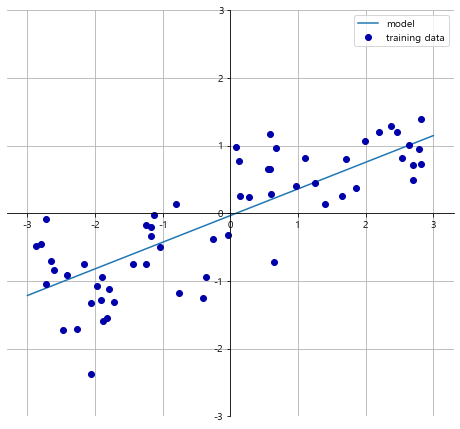

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

dir(lr)
print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

훈련 점수 :  0.6700890315075756
테스트 점수 :  0.65933685968637
기울기 : [0.39390555], 절편 : -0.031804343026759746


In [8]:
# 주제 : 전기 생산량과 소비량
# 귀무가설 : 전기 생산량과 전기 소비량의 상관 관계가 없다.
# 대립가설 : 전기 생산량과 전기 소비량의 상관 관계가 있다.

# 월별 전기 사용량(백만kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

# 생산량 4일때 사용량은 얼마인가?

In [9]:
from scipy import stats

result = stats.linregress(X, y)
result
# slope(기울기)=0.4956032360182905, intercept(y절편)=0.9195814280689418, rvalue(상관계수)=0.8929235125385305, 
# pvalue=9.238421943157891e-05<0.05 => 대립가설 : 관계있다

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728, intercept_stderr=0.3110591892275586)

In [10]:
slope, intercept, rv, pv, stderr = stats.linregress(X, y)
print(slope, intercept)

0.4956032360182905 0.9195814280689418


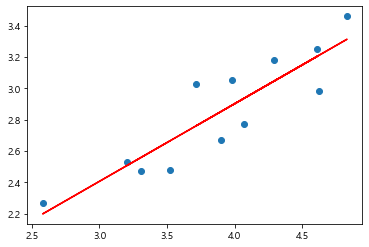

In [11]:
plt.scatter(X, y) # 산점도 그리기
plt.plot(np.array(X), slope*np.array(X)+intercept, c="red") # 회귀선 그리기

In [24]:
# 생산량 4일때 사용량은 얼마인가?
result = slope*4 + intercept
print("결과 : ", result)

결과 :  2.901994372142104


In [12]:
# 머신러닝 알고리즘 사용

# 1차원 리스트를 reshape로 2차원으로 바꿔주기 위함
num = np.array(X)
num = num.reshape(-1, 1)

lr2 = LinearRegression()
lr2.fit(num, y)
print(lr2.coef_, ", ", lr2.intercept_)

lr2.predict([[4]])

[0.49560324] ,  0.919581428068942


array([2.90199437])

#### 고차원 특성에 대한 과적합(Overfitting)

In [13]:
from mglearn.datasets import load_extended_boston

X, y = load_extended_boston()
print(X.shape) # 기존 boston 데이터는 컬럼이 13개 밖에 안 됨.
# 컬럼이 많을수록 과대적합 위험이 커짐

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))
# 선형회귀 모델은 사용법이 가장 간단하지만 튜닝이 불가능하다.
# 위 예시처럼 훈련과 테스트 점수 차가 크면 할 수 있는게 없다 => 규제 선형 모델을 사용하자!

(506, 104)
훈련 점수 :  0.9520519609032729
테스트 점수 :  0.6074721959665752


#### 선형 회귀의 장단점

- 장점 :
    + 사용법이 간단하다
    + 컬럼이 많아져도 간단히 사용 가능
- 단점 :
    + 튜닝이 불가능하다 => 규제 선형 모델
    + 다중 공선성 (컬럼 간 관련이 있을 수 있다)

## 규제 선형 모델

- 핸즈온 p184~
- 1) 릿지(Ridge) 회귀
    + L2 norm 규제 사용
- 2) 라쏘(Least Absolute Shrink and Selection Operator) 회귀
    + L1 norm 규제 사용
- 3) 엘라스틱 넷(Elastic Net)
    + L1 norm + L2 norm

### 1) 릿지(Ridge) 회귀 모델

- L2 규제(Regularization)
- MSE항에 Penalty항을 추가함
- 알파를 크게 하면 페널티의 효과가 커지고(가중치 감소), 작게 하면 그 반대가 된다.
- 모델을 단순하게 해주고, 훈련셋과 테스트셋에 대한 성능 차이를 절충하는 효과

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # alpha = 1.0 기본값
print("훈련 점수 : ", ridge.score(X_train, y_train))
print("테스트 점수 : ", ridge.score(X_test, y_test))

# 해석 : 선형 회귀 모델과 비교했을 때 훈련과 테스트 점수 차가 줄어듬

훈련 점수 :  0.885796658517094
테스트 점수 :  0.7527683481744755


In [39]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train) # alpha = 10
print("훈련 점수 : ", ridge10.score(X_train, y_train)) # 알파가 커져서 훈련 데이터에 대한 성능 떨어짐
print("테스트 점수 : ", ridge10.score(X_test, y_test))
# alpha(규제)가 커질수록 모델이 단순해짐 = 일반화

훈련 점수 :  0.7882787115369614
테스트 점수 :  0.635941148917731


In [30]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)  # alpha = 0.1
print("훈련 점수 : ", ridge01.score(X_train, y_train)) # 알파가 작아져서 모델이 훈련 데이터에 가까워짐
print("테스트 점수 : ", ridge01.score(X_test, y_test))
# alpha(규제)가 작아질수록 모델이 복잡해짐

# 적절한 alpha값을 찾는 것이 중요하다

훈련 점수 :  0.9282273685001985
테스트 점수 :  0.772206793647982


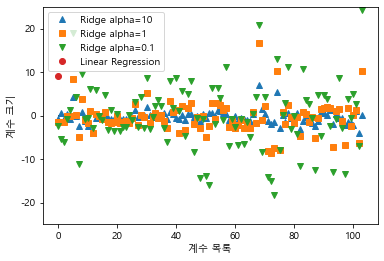

In [56]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="Linear Regression")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

# 해석 : alpha가 커질수록 직선에 가깝다 = 모델이 단순하다 = 일반화
# alpha가 작을수록 곡선에 가깝다 = 모델이 복잡하다 = 훈련 데이터에 가깝다 = 과대적합 위험

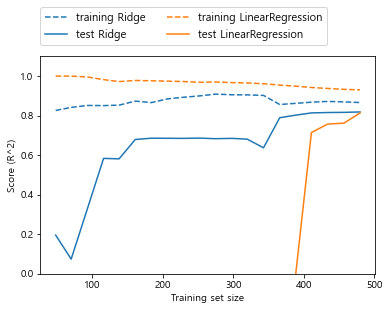

In [15]:
# 알파값을 1로 고정한 상태에서 데이터의 크기 조절
mglearn.plots.plot_ridge_n_samples()

# 해석 : 훈련 데이터만 성능이 좋은 것은 의미 없다.
# 데이터가 많을수록 training과 test의 성능이 비슷해짐 
# => 데이터의 양이 많으면 과대적합을 해결할 수 있다.(핸즈온 p59)

### 2) 라쏘(Lasso) 회귀 모델

- L1 규제 사용 
- MSE항에 Penalty항을 추가함
- 알파를 크게 하면 페널티의 효과가 커지고 작게 하면 그 반대가 된다.
- 특성 선택이 자동으로 이루어진다.
    + ridge 회귀는 가중치가 0에 가까워지나, 0이 될 수는 없다
    + lasso 회귀는 가중치가 0이 될 수 있다. => 즉, 특성이 사라질 수 있다.

In [16]:
from sklearn.linear_model import Lasso

In [17]:
lasso = Lasso().fit(X_train, y_train) # alpha=1.0
print("훈련 점수 : ", lasso.score(X_train, y_train))
print("테스트 점수 : ", lasso.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso.coef_ != 0)) # 전체 104개의 피처 중 4개만 사용
# 훈련, 테스트 성능이 너무 낮음 => 알파(규제)를 적절히 조절해야 한다

훈련 점수 :  0.29323768991114607
테스트 점수 :  0.20937503255272294
사용한 특성의 수 :  4


In [18]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) # alpha = 0.01, 알파가 작아지면 
print("훈련 점수 : ", lasso001.score(X_train, y_train)) # 모델은 훈련 데이터에 가까워짐
print("테스트 점수 : ", lasso001.score(X_test, y_test)) # 테스트 점수도 향상됨
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0)) # 33 개로 피처 개수 증가 
# 즉, 알파(규제)가 작아지면 모델이 복잡해짐

훈련 점수 :  0.8962226511086497
테스트 점수 :  0.7656571174549983
사용한 특성의 수 :  33


In [60]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) # alpha = 0.0001, 알파가 너무 작아지면 
print("훈련 점수 : ", lasso00001.score(X_train, y_train)) # 모델이 훈련 데이터에 더 가까워짐
print("테스트 점수 : ", lasso00001.score(X_test, y_test)) # 테스트 성능은 오히려 떨어짐 (테스트 점수와 훈련 점수 차이가 커짐) => 과대적합!
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0)) # 96개로 피처 개수 더 증가 => 복잡
# 즉, 알파(규제)가 너무 작아지면 모델이 너무 복잡해짐 => 과대적합 발생

훈련 점수 :  0.9507158754515467
테스트 점수 :  0.6437467421272709
사용한 특성의 수 :  96


### 경사 하강법

- 핸즈온 P164-
- 알파(learning rate)를 조절해서 최적화 알고리즘을 찾음
    + 알파가 너무 크면 발산
    + 알파가 너무 작으면 시간이 오래 걸림, 중간에 멈춤

### 3) ElasticNet

- Ridge + Lasso
- L1 norm + L2 norm
- 둘다 규제하기가 어려우므로 일반적으로 잘 쓰지 않음

---
### Boston Sample을 이용한 다중 선형 회귀

In [63]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)
print(boston.target)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 

![boston image](./data/boston.png)

In [31]:
model_boston = LinearRegression().fit(boston.data, boston.target)

In [32]:
model_boston.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [33]:
pred = model_boston.predict(boston.data)

Text(0.5, 1.0, '집값 예측치와 실제 집값의 관계')

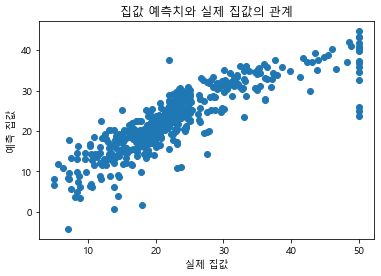

In [34]:
plt.scatter(boston.target, pred)
plt.xlabel("실제 집값")
plt.ylabel("예측 집값")
plt.title("집값 예측치와 실제 집값의 관계")

In [64]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(10)

# 종속변수(집값) 추가
df["MEDV"] = boston.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


C:\Users\chaek\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


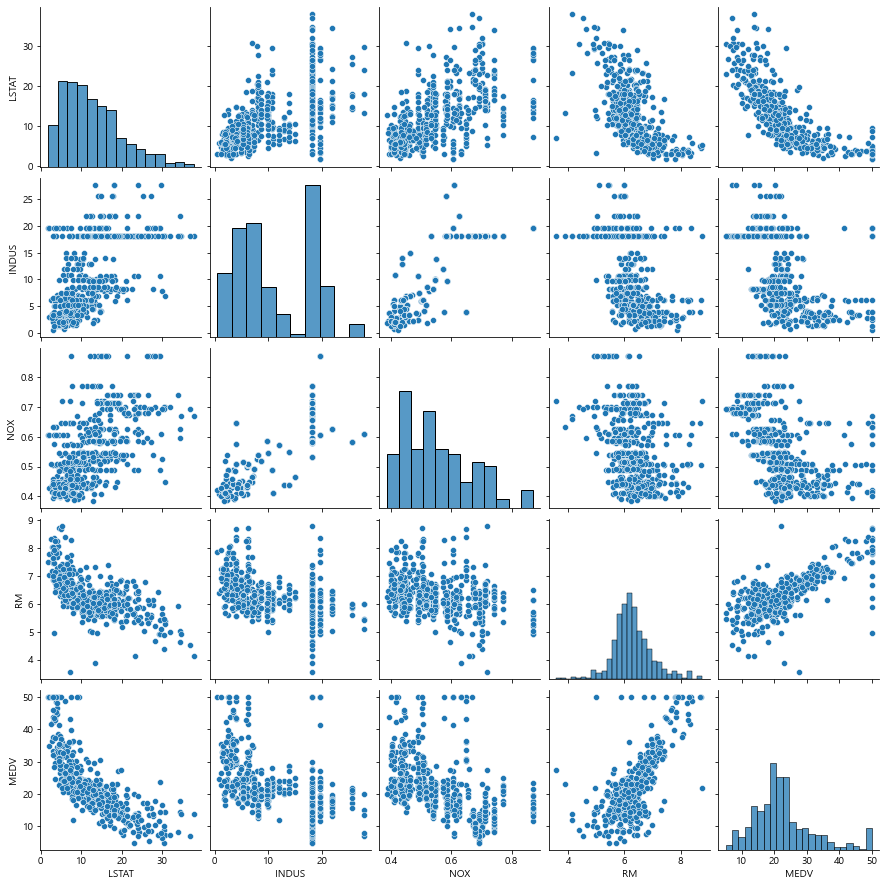

In [67]:
# seaborn의 pairplot
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]

sns.pairplot(df[cols], size=2.5)

# 해석: 방의 개수가 많을수록 집값이 높아진다.

<AxesSubplot:>

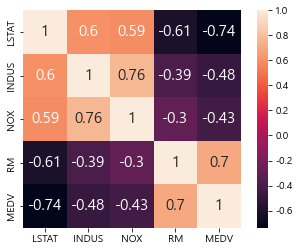

In [68]:
# seaborn의 heatmap

cc = np.corrcoef(df[cols].values.T)
cc
sns.heatmap(cc, yticklabels=cols, xticklabels=cols, annot=True, square=True,
           annot_kws={"size":15})

# 해석 : 방의개수와 집값 상관계수 = 0.7 가장 큰 양의 상관관계

In [69]:
# 방이 5개일 때 집값은 얼마인가?

X = df[["RM"]].values
y = df[["MEDV"]].values

lr = LinearRegression().fit(X, y)
print(lr.coef_, lr.intercept_)

house_price = lr.predict([[5]])

print("방이 [%d]인 주택가격은 약 [%.f]달러이다." %(5, house_price*1000))

[[9.10210898]] [-34.67062078]
방이 [5]인 주택가격은 약 [10840]달러이다.


## 로지스틱 선형 회귀

- 핸즈온 p193-
- L2 norm 규제를 사용
- C 파라미터를 사용해서 규제의 강도를 설정

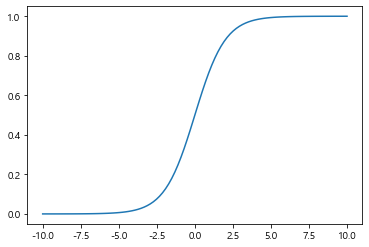

In [70]:
# sigmoid 함수 그래프 그리기

def sigmoid(x):
    result = []
    for i in x:
        result.append(1/(1+np.exp(-i)))
    return result

x = np.linspace(-8, 8, 100)
sig = sigmoid(x)

plt.plot(x, sig) # 2차원 곡선

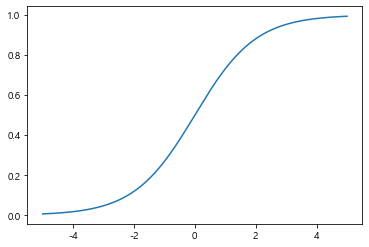

In [10]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, 1/(1+np.exp(-x)))

### 로지스틱 선형 회귀 vs SVM

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

C:\Users\chaek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\chaek\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


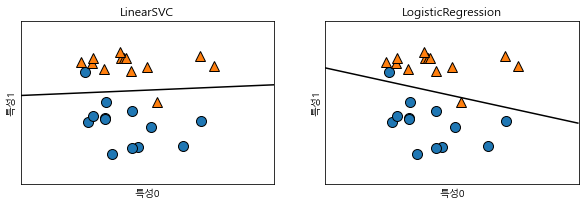

In [72]:
X, y = mglearn.datasets.make_forge()
_, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(C=1), LogisticRegression(C=1)], axes):
    mglearn.discrete_scatter(X[:,0], X[:,1], y , ax=ax)
    
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, ax=ax)
    
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")

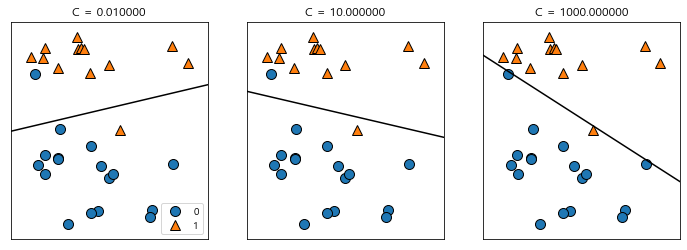

In [73]:
mglearn.plots.plot_linear_svc_regularization()

# 로지스틱 회귀분석에서는 C를 사용(alpha와 반대)
# C가 작을수록 규제가 강하다 -> 모델 단순화
# C가 클수록 규제가 약하다 -> 모델 복잡

In [74]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

#### C값에 따른 결과

In [80]:
logreg = LogisticRegression(C=1, penalty="l2", max_iter=10000).fit(X_train, y_train) # C=1, penalty="l2"(l2 norm 규제) 가 기본값
print("훈련 점수 : ", logreg.score(X_train, y_train))
print("테스트 점수 : ", logreg.score(X_test, y_test)) 

# 해석 : 테스트 점수가 더 높다? => 과소적합!?

훈련 점수 :  0.960093896713615
테스트 점수 :  0.965034965034965


In [76]:
logreg100 = LogisticRegression(C=100, penalty="l2", max_iter=10000).fit(X_train, y_train) # C=1, penalty="l2"(l2 norm 규제) 가 기본값
print("훈련 점수 : ", logreg100.score(X_train, y_train))
print("테스트 점수 : ", logreg100.score(X_test, y_test)) 

# 훈련점수 향상됨 => 해석 : C가 클수록 규제가 약해진다 => 모델이 복잡해져서 과소적합이 해소됨

훈련 점수 :  0.9812206572769953
테스트 점수 :  0.965034965034965


In [77]:
logreg001 = LogisticRegression(C=0.01, penalty="l2", max_iter=10000).fit(X_train, y_train) # C=1, penalty="l2"(l2 norm 규제) 가 기본값
print("훈련 점수 : ", logreg001.score(X_train, y_train))
print("테스트 점수 : ", logreg001.score(X_test, y_test)) 

# 해석 : C가 작을수록 규제가 강해진다 => 모델이 단순해짐 테스트 점수 향상

훈련 점수 :  0.9460093896713615
테스트 점수 :  0.972027972027972


In [81]:
# 'newton-cg', 'lbfgs', 'sag', and 'saga' handle L2 or no penalty
# 'libnear' and 'saga' also handle L1 penalty

logreg_l1 = LogisticRegression(C=1, penalty="l1", max_iter=10000, solver="liblinear").fit(X_train, y_train) # solver = saga, liblinear 시 l1규제
print("훈련 점수 : ", logreg_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg_l1.score(X_test, y_test))

# l1 규제 시 과소적합 좀 줄어듬

훈련 점수 :  0.960093896713615
테스트 점수 :  0.958041958041958


In [82]:
logreg100_l1 = LogisticRegression(C=100, penalty="l1", max_iter=10000, solver="liblinear").fit(X_train, y_train) # solver = saga, liblinear 시 l1규제
print("훈련 점수 : ", logreg100_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg100_l1.score(X_test, y_test))

훈련 점수 :  0.9882629107981221
테스트 점수 :  0.972027972027972


In [83]:
logreg001_l1 = LogisticRegression(C=0.01, penalty="l1", max_iter=10000, solver="liblinear").fit(X_train, y_train) # solver = saga, liblinear 시 l1규제
print("훈련 점수 : ", logreg001_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg001_l1.score(X_test, y_test))

훈련 점수 :  0.9107981220657277
테스트 점수 :  0.951048951048951


#### KNN, LogisticRegression, LinearSVC의 성능비교

In [84]:
dir(cancer)
cancer.data.shape
cancer.feature_names
cancer.target_names # 'malignant' : 악성, 'benign' : 양성
np.bincount(cancer.target) # 212:악성, 357:양성
#cancer.target[cancer.target==0].shape # (212,)

array([212, 357], dtype=int64)

In [91]:
# LogisticRegression

scores = []

#X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
    
    model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

In [92]:
print("scores = ", scores)
print(np.mean(np.array(scores)))

# LogisticRegression 성능이 가장 좋다

scores =  [0.958041958041958, 0.965034965034965, 0.9300699300699301, 0.9300699300699301, 0.9370629370629371, 0.9300699300699301, 0.972027972027972, 0.9300699300699301, 0.965034965034965, 0.951048951048951]
0.9468531468531468


In [87]:
# LinearSVC

scores = []

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
    
for i in range(10):
    model = LinearSVC(max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

C:\Users\chaek\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\chaek\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\chaek\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\chaek\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\chaek\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

In [88]:
print("scores = ", scores)
print(np.mean(np.array(scores)))

# LinearSVC 성능이 가장 낮다

scores =  [0.9370629370629371, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9300699300699301, 0.9230769230769231, 0.9370629370629371, 0.7902097902097902, 0.8881118881118881, 0.9020979020979021]
0.9097902097902099


In [58]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

scores = []

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
    
for i in range(10):
    model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

In [59]:
print("scores = ", scores)
print(np.mean(np.array(scores)))

# KNN 계속 비슷한 성능 나타냄

scores =  [0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231]
0.9230769230769231


In [76]:
# LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
    
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print("scores = ", scores)

scores =  0.951048951048951


In [74]:
# LinearSVC : 실행 시마다 스코어 달라짐(튜닝 하기 어려움)
scores = []

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

for i in range(10):
    model = LinearSVC(max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
print("scores = ", scores)
print(np.mean(np.array(scores)))

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


scores =  [0.951048951048951, 0.8531468531468531, 0.951048951048951, 0.951048951048951, 0.8671328671328671, 0.9370629370629371, 0.951048951048951, 0.9370629370629371, 0.9370629370629371, 0.8811188811188811]
0.9216783216783216


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [77]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
    
model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print("scores = ", scores)

scores =  0.9370629370629371


([<matplotlib.axis.XTick at 0x27a52fda9d0>,
 [Text(1, 0, 'mean radius'),
  Text(2, 0, 'mean texture'),
  Text(3, 0, 'mean perimeter'),
  Text(4, 0, 'mean area'),
  Text(5, 0, 'mean smoothness'),
  Text(6, 0, 'mean compactness'),
  Text(7, 0, 'mean concavity'),
  Text(8, 0, 'mean concave points'),
  Text(9, 0, 'mean symmetry'),
  Text(10, 0, 'mean fractal dimension'),
  Text(11, 0, 'radius error'),
  Text(12, 0, 'texture error'),
  Text(13, 0, 'perimeter error'),
  Text(14, 0, 'area error'),
  Text(15, 0, 'smoothness error'),
  Text(16, 0, 'compactness error'),
  Text(17, 0, 'concavity error'),
  Text(18, 0, 'concave points error'),
  Text(19, 0, 'symmetry error'),
  Text(20, 0, 'fractal dimension error'),
  Text(21, 0, 'worst radius'),
  Text(22, 0, 'worst texture'),
  Text(23, 0, 'worst perimeter'),
  Text(24, 0, 'worst area'),
  Text(25, 0, 'worst smoothness'),
  Text(26, 0, 'worst compactness'),
  Text(27, 0, 'worst concavity'),
  Text(28, 0, 'worst concave points'),
  Text(29, 0, '

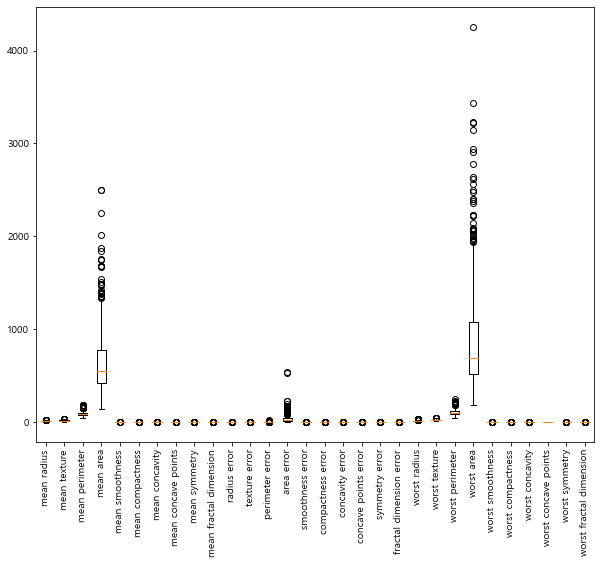

In [93]:
# 이상치 검출을 위한 boxplot
plt.figure(figsize=(10, 8))
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)

# 이상치가 존재하면 위 알고리즘 사용 시 성능 차이가 심하다(특히 SVM)

In [94]:
### standardization

# 속성별 평균
m = cancer.data.mean(axis = 0)

# 속성별 표준변차
s = cancer.data.std(axis = 0)

data1 = (cancer.data - m) / s

([<matplotlib.axis.XTick at 0x27a557d03a0>,
 [Text(1, 0, 'mean radius'),
  Text(2, 0, 'mean texture'),
  Text(3, 0, 'mean perimeter'),
  Text(4, 0, 'mean area'),
  Text(5, 0, 'mean smoothness'),
  Text(6, 0, 'mean compactness'),
  Text(7, 0, 'mean concavity'),
  Text(8, 0, 'mean concave points'),
  Text(9, 0, 'mean symmetry'),
  Text(10, 0, 'mean fractal dimension'),
  Text(11, 0, 'radius error'),
  Text(12, 0, 'texture error'),
  Text(13, 0, 'perimeter error'),
  Text(14, 0, 'area error'),
  Text(15, 0, 'smoothness error'),
  Text(16, 0, 'compactness error'),
  Text(17, 0, 'concavity error'),
  Text(18, 0, 'concave points error'),
  Text(19, 0, 'symmetry error'),
  Text(20, 0, 'fractal dimension error'),
  Text(21, 0, 'worst radius'),
  Text(22, 0, 'worst texture'),
  Text(23, 0, 'worst perimeter'),
  Text(24, 0, 'worst area'),
  Text(25, 0, 'worst smoothness'),
  Text(26, 0, 'worst compactness'),
  Text(27, 0, 'worst concavity'),
  Text(28, 0, 'worst concave points'),
  Text(29, 0, '

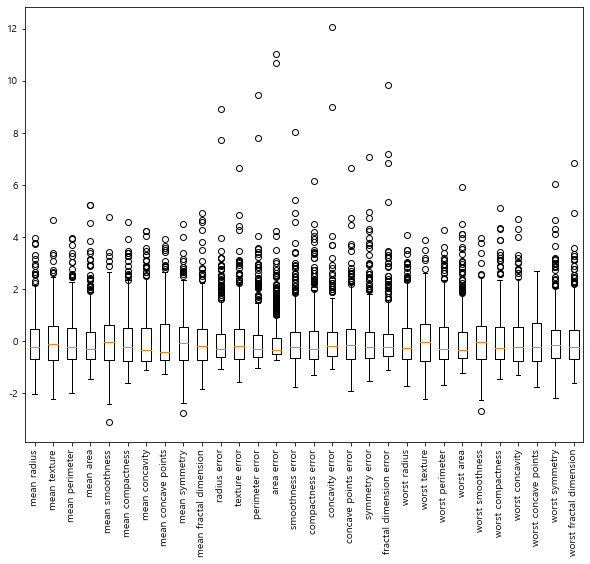

In [95]:
plt.figure(figsize=(10, 8))
plt.boxplot(data1)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)

In [96]:
# LogisticRegression에 표준화 적용
X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=0)
    
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print("scores = ", scores)

# 표준화 후 1~2프로 성능 향상됨

scores =  0.965034965034965


In [97]:
# LinearSVC에 표준화 적용
scores = []

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=0)

for i in range(10):
    model = LinearSVC(max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
print("scores = ", scores)
print(np.mean(np.array(scores)))

# 표준화 후 SVM도 성능 향상됨

scores =  [0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441]
0.944055944055944


In [103]:
# KNN에 표준화 적용

from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=0)
    
model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print("scores = ", scores)

scores =  0.951048951048951


In [91]:
# LogisticRegression에 C=100/0.01으로 설정
X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target, random_state=0)
    
model = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)

print("scores = ", scores)

# 성능 떨어짐

scores =  0.951048951048951


In [105]:
# LinearSVC에 C=100/0.01으로 설정
scores = []

X_train, X_test, y_train, y_test = train_test_split(data1, cancer.target)

for i in range(10):
    model = LinearSVC(C=0.01,max_iter=10000).fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
print("scores = ", scores)
print(np.mean(np.array(scores)))

# C가 0.01 작아지면 성능 향상됨=>가장 좋은 성능을 보여줌

scores =  [0.965034965034965, 0.965034965034965, 0.965034965034965, 0.965034965034965, 0.965034965034965, 0.965034965034965, 0.965034965034965, 0.965034965034965, 0.965034965034965, 0.965034965034965]
0.965034965034965


### 다중 클래스 분류

- 핸즈온 p145-
- Sklearn 알고리즘들(SVM)은 이진 클래스 분류만 가능 (다중 분류하려면 이진 분류 함수를 여러번 써야 한다)
- 단, multinomial Logistic Regression(= Softmax regression), SGD 분류기, 랜덤 포레스트 분류기, Naive Bayes은 다중 클래스 분류 지원

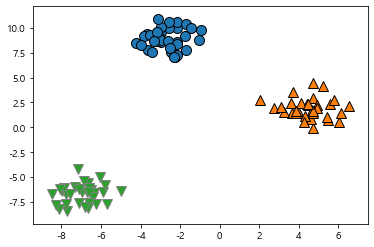

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [6]:
linear_svc = LinearSVC().fit(X, y)
print(linear_svc.coef_)
print(linear_svc.intercept_)
#print(linear_svc.coef_[0])
#print(linear_svc.coef_[1])
#print(linear_svc.coef_.shape)
#print(linear_svc.intercept_.shape)

[[-0.17492463  0.23140749]
 [ 0.47621286 -0.06937654]
 [-0.18914295 -0.20399592]]
[-1.07745421  0.131407   -0.08604807]


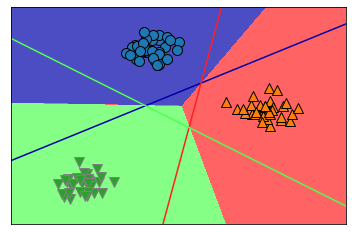

In [117]:
# 이진 분류 3번 사용해서 분류
mglearn.plots.plot_2d_classification(linear_svc, X, fill=True, alpha=.7) # 가운데 영역도 분류하자!
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)

## 적합도 검정(성능 측정)

- 핸즈온 p131- 3.3 성능 측정

- Accuracy : 정확도 (모든 데이터 중에서)
    - (TN + TP) / (TN + FP+FN+TP)
- Precision : 정밀도 (예측한 값이 양성인 데이터 중에서 실제 값이 양성과 같은 데이터의 비율)
    - TP / (FP + TP)
- Recall : 재현율 (실제 값이 양성인 데이터 중에서 예측과 실제값이 양성으로 일치한 비율)
    - TP / (FN + TP)
- F1 Score
    - Precision과 Recall의 조화 평균
    
![nn](data/confusionmatrix.jpg)

- ROC 곡선, AUC (p141)
    - 이진 분류에서만 사용 가능

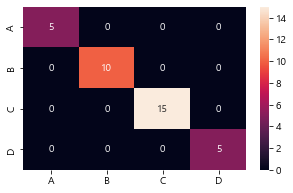

In [3]:
arr = [[5, 0, 0, 0],
[0, 10, 0, 0],
[0, 0, 15, 0],
[0, 0, 0, 5]]

df_cm = pd.DataFrame(arr, index=[i for i in "ABCD"], columns = [i for i in "ABCD"])
df_cm
plt.figure(figsize=(5,3))
sns.heatmap(df_cm, annot=True)

<AxesSubplot:>

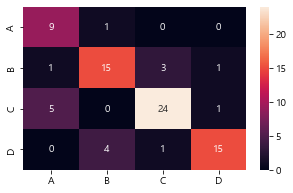

In [7]:
arr = [[9, 1, 0, 0],
[1, 15, 3, 1],
[5, 0, 24, 1],
[0, 4, 1, 15]]

df_cm = pd.DataFrame(arr, index=[i for i in "ABCD"], columns = [i for i in "ABCD"])
df_cm
plt.figure(figsize=(5,3))
sns.heatmap(df_cm, annot=True)

<AxesSubplot:>

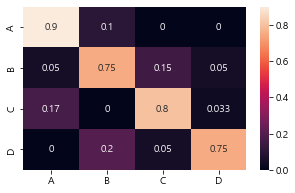

In [8]:
# 정규화

total = np.sum(arr, axis=1)
total
arr = arr / total[:, None]
arr

df_cm = pd.DataFrame(arr, index=[i for i in "ABCD"], columns = [i for i in "ABCD"])
df_cm
plt.figure(figsize=(5,3))
sns.heatmap(df_cm, annot=True)

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
# 다중 분류
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [11]:
# 이진 분류
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [13]:
# precision, recall, f1-score 확인
from sklearn.metrics import classification_report

y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

print(classification_report(y_true, y_pred, target_names=["class 0", "class 1"]))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



### ROC curve(with AUC)

- 이진 분류에서 사용

In [14]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=0)
X[:10, :]
y[:10]

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [16]:
model = LogisticRegression().fit(X, y)

In [17]:
y_hat = model.predict(X)

In [18]:
print(y_hat[:40])
print(y[:40])

[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]
[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]


In [20]:
confusion_matrix(y, y_hat)

array([[477,  20],
       [ 28, 475]], dtype=int64)

In [21]:
print(classification_report(y, y_hat, target_names=["class0","class1"]))

              precision    recall  f1-score   support

      class0       0.94      0.96      0.95       497
      class1       0.96      0.94      0.95       503

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [22]:
from sklearn.metrics import roc_curve

Text(0, 0.5, 'True Positive Ratio(Recall)')

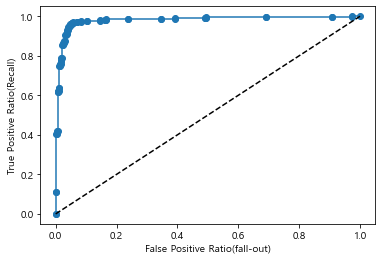

In [23]:
# tpr = 재현율, fpr = fall-out
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))

plt.plot(fpr, tpr, "o-", label="Logistic Regression")
plt.plot([0,1], [0,1], "k--", label="Random Guess")
plt.xlabel("False Positive Ratio(fall-out)")
plt.ylabel("True Positive Ratio(Recall)")

In [24]:
from sklearn.metrics import roc_auc_scorec_score

In [25]:
roc_auc_score(y, model.decision_function(X))

0.9795592641335089

---
### 사례1 : 타이타닉 예제
- 성능을 제대로 측정했는지에 대한 관점

In [26]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# 전처리가 필요없는 컬럼
cols_to_keep = ["Survived", "Age", "Fare"]

In [29]:
# Pclass 의 더미변수화(one hot encoding)
dummy_class = pd.get_dummies(df["Pclass"], prefix="Pclass")
dummy_class.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [30]:
# Sex 의 더미변수화(one hot encoding)
dummy_sex = pd.get_dummies(df["Sex"], prefix="Sex")
dummy_sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [32]:
df1 = df[cols_to_keep].join(dummy_class.loc[:,"Pclass1":])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,1,0,0
4,0,35.0,8.0500,0,0,1


In [34]:
df1 = df1.join(dummy_sex.loc[:, "Sex_male"])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,0,1,1
1,1,38.0,71.2833,1,0,0,0
2,1,26.0,7.9250,0,0,1,0
3,1,35.0,53.1000,1,0,0,0
4,0,35.0,8.0500,0,0,1,1


In [36]:
# Survived를 제외한 나머지 컬럼(특성) 추출
train_cols = df1.columns[1:]
train_cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male'], dtype='object')

In [39]:
# 결측치 확인
np.isnan(df1[train_cols])
df1.isnull().sum()

# 결측치 삭제
#df1[train_cols] = df1[train_cols].dropna(axis=0)
#df1["Survived"] = df1["Survived"].dropna(axis=0)

# 0으로 대체
df1[train_cols] = df1[train_cols].fillna(0)
df1["Survived"] = df1["Survived"].fillna(0)

In [40]:
import statsmodels.api as sm

In [42]:
model = sm.Logit(df1["Survived"], df1[train_cols]).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.458488
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              829.0250  
Date:               2021-01-12 11:45 BIC:              857.7791  
No. Observations:   891              Log-Likelihood:   -408.51   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      1.0371e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0159    0.0053   -2.9843  0.0028  -0.0264  -0.0055
Fare          0.0015    0.0021    0.7370  0.4611  -0.0026   0.0056
Pclass_1      2.6932    0.3372    7.9875  0.0000   2.0323   3.3540
Pclass_2      1.8519    0.2670    6.9358  0.0000   1.3286   2.3752
Pclass_3      0.6215    0.1808    3.4377  0.0006   0.2672   0.9758
Sex_male     -2.6151    0.1860  -14.0594  0.0000  -2.9797  -2.2505
=================================================================

"""

In [1]:
model2 = LogisticRegression().fit(df1[train_cols], df1["Survived"])

NameError: name 'LogisticRegression' is not defined

In [46]:
df1["predict"] = model2.predict(df1[train_cols])
df1.head(40)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,predict
0,0,22.0,7.2500,0,0,1,1,0
1,1,38.0,71.2833,1,0,0,0,1
2,1,26.0,7.9250,0,0,1,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0
5,0,0.0,8.4583,0,0,1,1,0
6,0,54.0,51.8625,1,0,0,1,0
7,0,2.0,21.0750,0,0,1,1,0
8,1,27.0,11.1333,0,0,1,0,1
9,1,14.0,30.0708,0,1,0,0,1


In [49]:
confusion_matrix(df1["Survived"], df1["predict"], labels=[1, 0])

array([[242, 100],
       [ 93, 456]], dtype=int64)

In [52]:
# 일단 정확도를 확인
print("정확도 : ", model2.score(df1[train_cols], df1["Survived"]))
print("정확도 : ", (242+456)/(242+100+93+456))

정확도 :  0.7833894500561167
정확도 :  0.7833894500561167


In [55]:
print(classification_report(df1["Survived"], df1["predict"]))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       549
           1       0.72      0.71      0.71       342

    accuracy                           0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891



Text(0, 0.5, 'True Positive Ratio(Recall)')

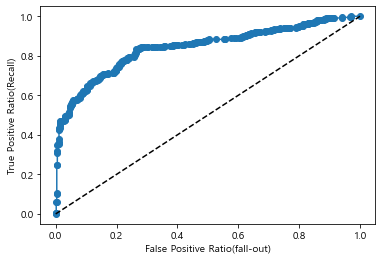

In [59]:
# ROC 곡선
fpr, tpr, thresholds = roc_curve(df1["Survived"], model2.decision_function(df1[train_cols]))

plt.plot(fpr, tpr, "o-", label="Logistic Regression")
plt.plot([0,1], [0,1], "k--", label="Random Guess")
plt.xlabel("False Positive Ratio(fall-out)")
plt.ylabel("True Positive Ratio(Recall)")

In [60]:
roc_auc_score(df1["Survived"], model2.decision_function(df1[train_cols]))

0.8414235345497928